In [1]:
import pandas
pandas.__version__

'1.1.3'

In [2]:
import pandas as pd

import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import os.path
os.getcwd()


'C:\\Users\\ykele\\Openclassrooms\\P2_keles_yalcin_education'

In [3]:
listings_StatsData = pd.read_csv('EdStatsData.csv')
listings_StatsCountry = pd.read_csv('EdStatsCountry.csv')
listings_StatsCountrySeries = pd.read_csv('EdStatsCountrySeries.csv')
listings_StatsFootNote = pd.read_csv('EdStatsFootNote.csv')
listings_StatsSeries = pd.read_csv('EdStatsSeries.csv')

In [4]:
listings_StatsData.isnull().sum().tail(30)

2006           746618
2007           749658
2008           752543
2009           744822
2010           644488
2011           740918
2012           739666
2013           749421
2014           773141
2015           755872
2016           870470
2017           886787
2020           835494
2025           835494
2030           835494
2035           835494
2040           835494
2045           835494
2050           835494
2055           835494
2060           835494
2065           835494
2070           835494
2075           835494
2080           835494
2085           835494
2090           835494
2095           835494
2100           835494
Unnamed: 69    886930
dtype: int64

In [5]:
listings_StatsData.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [6]:
#l'année 2015 (récent, nombre de données) sera l'année choisie pour l'étude.

In [7]:
drop2015=['Indicator Name','1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100','Unnamed: 69']
listings_StatsData2015=listings_StatsData.drop(drop2015,axis='columns',inplace=False)
listings_StatsData2015

,Country Name,Country Code,Indicator Code,2015
0,Arab World,ARB,UIS.NERA.2,NaN
1,Arab World,ARB,UIS.NERA.2.F,NaN
2,Arab World,ARB,UIS.NERA.2.GPI,NaN
3,Arab World,ARB,UIS.NERA.2.M,NaN
4,Arab World,ARB,SE.PRM.TENR,NaN
...,...,...,...,...
886925,Zimbabwe,ZWE,UIS.LP.AG15T24.M,NaN
886926,Zimbabwe,ZWE,SE.ADT.1524.LT.ZS,NaN
886927,Zimbabwe,ZWE,SE.ADT.1524.LT.FE.ZS,NaN
886928,Zimbabwe,ZWE,SE.ADT.1524.LT.FM.ZS,NaN


In [8]:
listings_StatsData2015['CountryNI']=listings_StatsData2015['Country Name']+";"+listings_StatsData2015['Indicator Code']
listings_StatsData2015['CountryNI'].value_counts()

Seychelles;BAR.TER.ICMP.6064.ZS                               1
Tonga;SE.SEC.ENRR.MA                                          1
Lesotho;LO.EGRA.CWPM.ZERO.SPN.3GRD                            1
Peru;UIS.G.5.B.T                                              1
East Asia & Pacific;UIS.TRTP.4.F                              1
                                                             ..
Middle income;UIS.E.2.F                                       1
Heavily indebted poor countries (HIPC);PRJ.ATT.2529.NED.MA    1
Serbia;PRJ.ATT.2039.4.MA                                      1
South Asia;PRJ.POP.1519.3.MA                                  1
Kazakhstan;LO.LLECE.REA6.3.FE                                 1
Name: CountryNI, Length: 886930, dtype: int64

In [9]:
#le tableau listings_StatsData2015 (idem pour 2010) n'a qu'un code par pays. Pas nécessaire de supprimer les doublons
# Ramenons les topics sur notre dataframe

listings_StatsSeries.rename(columns={'Series Code':'Indicator Code'},inplace=True)
                            
listings_StatsData2015_V2 = pd.merge(listings_StatsData2015, listings_StatsSeries,
                    on ='Indicator Code', 
                   how ='inner')

In [10]:
table2015 = pd.pivot_table(listings_StatsData2015_V2, values='2015', index=['Country Code','Country Name'],
                    columns=['Topic','Indicator Code'], aggfunc=np.sum)

table2015.to_csv('Stats2015.csv')

table2015.shape

(242, 3612)

In [11]:
#supprimons les indicateurs vides et préparons les indicateurs pour les colonnes
#il y a 242 pays, régions



table2015_V2=table2015.replace(0, np.nan)



#création d'une nouvelle ligne qui calcule le nombre de ligne vide par indicateurs
 #combien de valeurs non vides par colonne ?

ligneZ1=list(242-table2015_V2.isna().sum())

table2015_V2.loc[1]=(ligneZ1)
table2015_V2

 #filtrer les colonnes avec table2015_V3[1]=0
table2015_V2.filter(like='1',axis=0)

codeBarVide=[]
listeCol=list(table2015_V2.columns)

for i in listeCol :
    if table2015_V2[i][1]<20:
        codeBarVide.append(i)

codeBarVide  #liste à supprimer de table2015_V3 
table2015_V2=table2015_V2.drop(codeBarVide,axis='columns',inplace=False) #on passe de 3612 colonne à 950
table2015_V2


#Ajoutons une colonne index :
table2015_V2['Index'] = table2015_V2.index


#création d'une nouvelle colonne nbIndic qui calcule le nombre de colonne non vide par pays
table2015_V2['nbIndic']=table2015_V2.loc[:,(                   "Attainment",   "BAR.NOED.1519.FE.ZS"):("Workforce Development (SABER)", "SABER.WORK.GOAL3.LVL3")].count(1)
table2015_V3=table2015_V2.sort_values(by=['nbIndic'])



### attention : pensez à supprimer la ligne d'index 1 ###
table2015_V3=table2015_V3.drop(1,axis='rows',inplace=False)

In [12]:
# supprimer les pays avec - de 20% d'incidateur
table2015_V3.shape

# 242 lignes, 950 indicateurs. 20% de 950 vaut 190.

table2015_V4=table2015_V3[table2015_V3['nbIndic']>190]

table2015_V4.shape
#il nous reste 188 pays


(188, 951)

In [13]:
#nb de cases nulles par indicateur



#"Infrastructure: Communications“ 
table2015_V4['Infrastructure: Communications']
InfraCom2015=table2015_V4['Infrastructure: Communications'].isnull().sum().to_frame('nulls').sort_values(by=['nulls'])

#Secondary
table2015_V4['Secondary']
secondary2015=table2015_V4['Secondary'].isnull().sum().to_frame('nulls').sort_values(by=['nulls'])

#Tertiary
table2015_V4['Tertiary']
tertiary2015=table2015_V4['Tertiary'].isnull().sum().to_frame('nulls').sort_values(by=['nulls'])

#Expenditures
table2015_V4['Expenditures']
expend2015=table2015_V4['Expenditures'].isnull().sum().to_frame('nulls').sort_values(by=['nulls'])

#Population
table2015_V4['Population']
pop2015=table2015_V4['Population'].isnull().sum().to_frame('nulls').sort_values(by=['nulls'])

#Teachers
table2015_V4['Teachers']
teachers2015=table2015_V4['Teachers'].isnull().sum().to_frame('nulls').sort_values(by=['nulls'])


#Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators
table2015_V4['Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators']
PIB2015=table2015_V4['Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators'].isnull().sum().to_frame('nulls').sort_values(by=['nulls'])


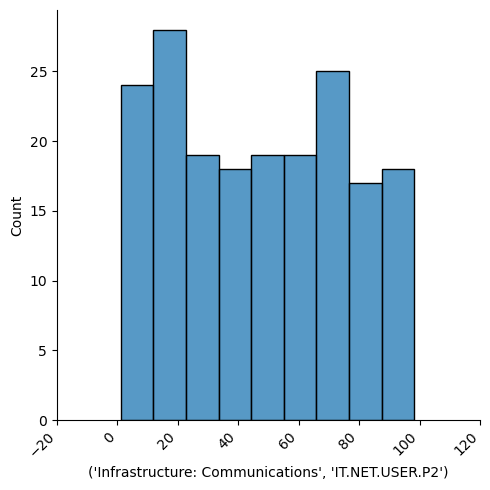

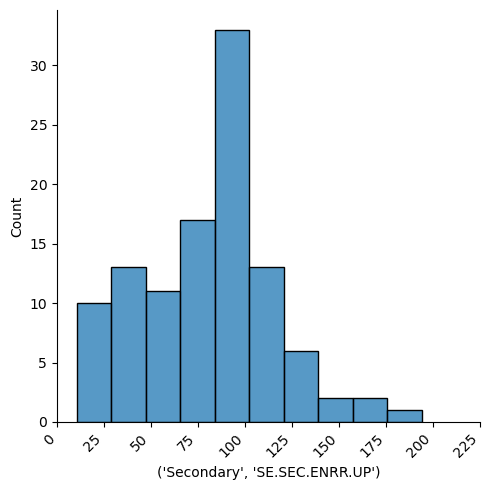

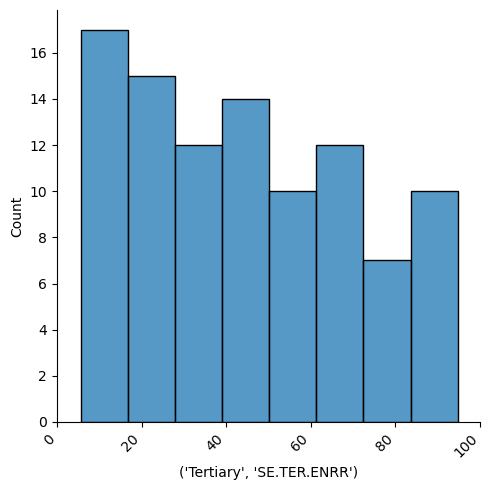

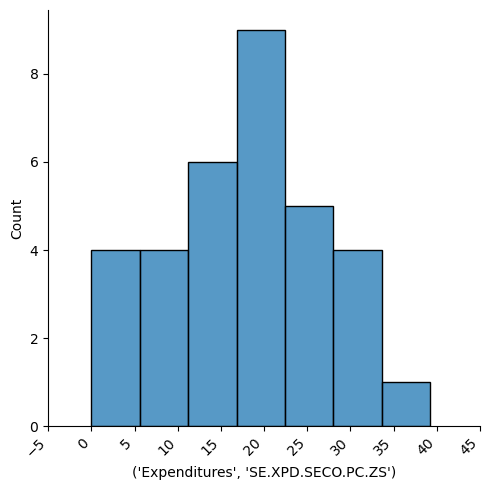

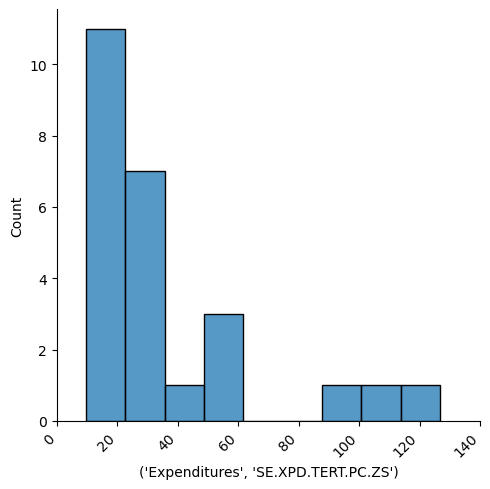

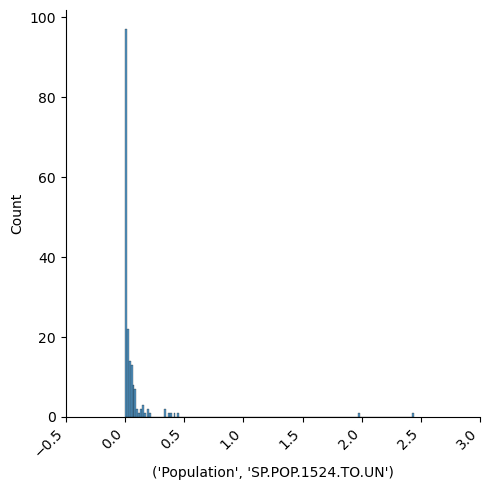

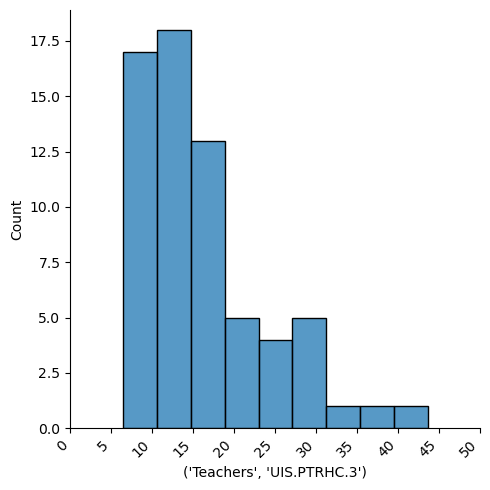

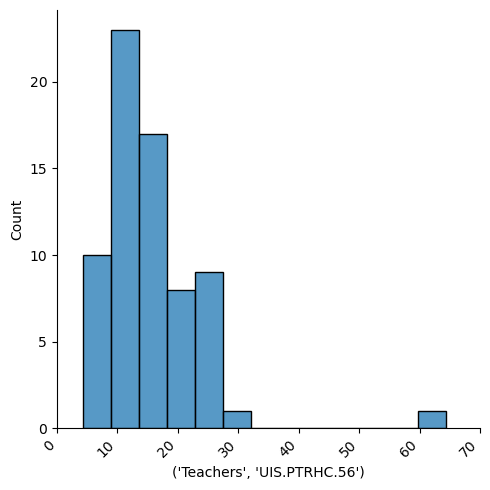

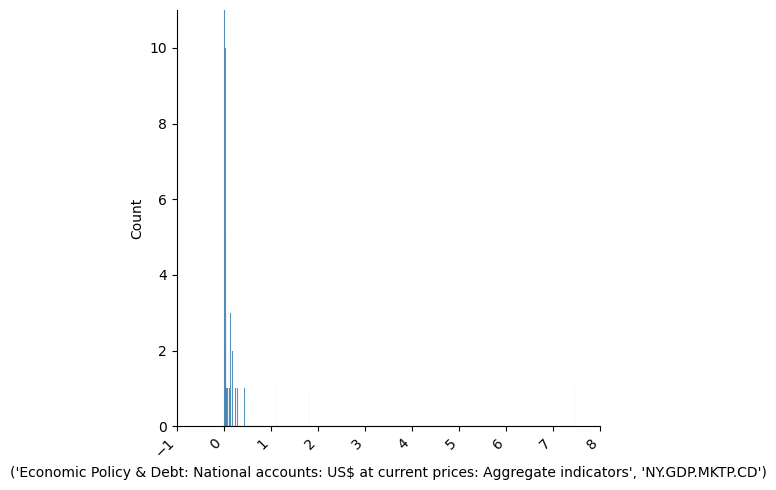

In [14]:
#Sélection des indicateurs
# rappel : nous avons 188 pays


#"Infrastructure: Communications“ 
InfraCom2015                                                   # 1 vides          
InfraCom2015.filter(like='IT.NET.USER.P2',axis=0)


Icom=sns.displot(data=table2015_V4[('Infrastructure: Communications','IT.NET.USER.P2')])
Icom.set_xticklabels(rotation=45, ha="right")
plt.tight_layout()
plt.show()


#Secondary
secondary2015                                                   # min : 3 vides, max : 123 vides
secondary2015.filter(like='SE.SEC.ENRR.UP',axis=0)             # 80 vides 


sec=sns.displot(data=table2015_V4[('Secondary','SE.SEC.ENRR.UP')])
sec.set_xticklabels(rotation=45, ha="right")
plt.tight_layout()
plt.show()


#Tertiary
tertiary2015                                        # min : 84 vides, max : 154 vides
tertiary2015.filter(like='SE.TER.ENRR',axis=0)     # 91 vides


tert=sns.displot(data=table2015_V4[('Tertiary','SE.TER.ENRR')])
tert.set_xticklabels(rotation=45, ha="right")
plt.tight_layout()
plt.show()


#Expenditures
expend2015                                            # min : 149 vides, max : 164 vides
expend2015.filter(like='SE.XPD.SECO.PC.ZS',axis=0)    # 155 vides
expend2015.filter(like='SE.XPD.TERT.PC.ZS',axis=0)    # 163 vides

exp1=sns.displot(data=table2015_V4[('Expenditures','SE.XPD.SECO.PC.ZS')])
exp1.set_xticklabels(rotation=45, ha="right")
plt.tight_layout()
plt.show()

exp2=sns.displot(data=table2015_V4[('Expenditures','SE.XPD.TERT.PC.ZS')])
exp2.set_xticklabels(rotation=45, ha="right")
plt.tight_layout()
plt.show()


#Population
pop2015                                               # min : 5 vides, max : 71 vides
pop2015.filter(like='SP.POP.1524.TO.UN',axis=0)      # vides : 7 

pop=sns.displot(data=table2015_V4[('Population','SP.POP.1524.TO.UN')])
pop.set_xticklabels(rotation=45, ha="right")
plt.tight_layout()
plt.show()


#Teachers3
teachers2015                                            # min : 85 vides, max : 162 vides
teachers2015.filter(like='UIS.PTRHC.3',axis=0)                   #123 vides
teachers2015.filter(like='UIS.PTRHC.56',axis=0)                  #119 vides


tchrs3=sns.displot(data=table2015_V4[('Teachers','UIS.PTRHC.3')])
tchrs3.set_xticklabels(rotation=45, ha="right")
plt.tight_layout()
plt.show()

tchrs56=sns.displot(data=table2015_V4[('Teachers','UIS.PTRHC.56')])
tchrs56.set_xticklabels(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# PIB

PIB2015                                                  # min : 9 vides, max : 12 vides
PIB2015.filter(like='NY.GDP.MKTP.CD',axis=0)                 # 9 vides

pib=sns.displot(table2015_V4[("Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators",'NY.GDP.MKTP.CD')],height=5)
pib.set_xticklabels(rotation=45, ha="right")
pib.ax.set_ylim(0, 11)
plt.tight_layout()
plt.show()


#listeIndic={
#"Infrastructure: Communications":'IT.NET.USER.P2',
#"Secondary":'SE.SEC.ENRR.UP',
#"Tertiary":'SE.TER.ENRR',
#"Expenditures":['SE.XPD.SECO.PC.ZS','SE.XPD.TERT.PC.ZS'],
#"Population":'SP.POP.1524.TO.UN',
#"Teachers":['UIS.PTRHC.3','UIS.PTRHC.56'],
#"Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators":'NY.GDP.MKTP.CD'}

listeIndic2=['IT.NET.USER.P2','SE.SEC.ENRR.UP','SE.TER.ENRR','SE.XPD.SECO.PC.ZS','SE.XPD.TERT.PC.ZS','SP.POP.1524.TO.UN','UIS.PTRHC.3','UIS.PTRHC.56','NY.GDP.MKTP.CD']


#fig, ax =plt.subplots(2,2)
#sns.distplot(ax=ax[0,0],data=table2015_V4['SE.SEC.ENRR.UP'])
#sns.distplot(ax=ax[0,1],data=table2015_V4['IT.NET.USER.P2'])
#sns.distplot(ax=ax[1,1],data=table2015_V4['NY.GDP.MKTP.CD'])
#fig.show()




In [15]:
table2015_V4

Topic                          Attainment                                      \
Indicator Code          PRJ.ATT.1519.1.FE PRJ.ATT.1519.1.MA PRJ.ATT.1519.1.MF   
(SYC, Seychelles)                     NaN               NaN               NaN   
(LBY, Libya)                          NaN               NaN               NaN   
(PNG, Papua New Guinea)               NaN               NaN               NaN   
(YEM, Yemen, Rep.)                    NaN               NaN               NaN   
(BRB, Barbados)                       NaN               NaN               NaN   
...                                   ...               ...               ...   
(THA, Thailand)                      0.18              0.27              0.23   
(CRI, Costa Rica)                    0.41              0.47              0.44   
(ESP, Spain)                         0.07              0.06              0.07   
(TUR, Turkey)                        0.49              0.42              0.45   
(COL, Colombia)                      0.23              0.30              0.27   

Topic                                                                          \
Indicator Code          PRJ.ATT.1519.2.FE PRJ.ATT.1519.2.MA PRJ.ATT.1519.2.MF   
(SYC, Seychelles)                     NaN               NaN               NaN   
(LBY, Libya)                          NaN               NaN               NaN   
(PNG, Papua New Guinea)               NaN               NaN               NaN   
(YEM, Yemen, Rep.)                    NaN               NaN               NaN   
(BRB, Barbados)                       NaN               NaN               NaN   
...                                   ...               ...               ...   
(THA, Thailand)                      0.34              0.49              0.42   
(CRI, Costa Rica)                    0.33              0.28              0.30   
(ESP, Spain)                         0.61              0.68              0.65   
(TUR, Turkey)                        0.18              0.26              0.22   
(COL, Colombia)                      0.35              0.32              0.33   

Topic                                                                          \
Indicator Code          PRJ.ATT.1519.3.FE PRJ.ATT.1519.3.MA PRJ.ATT.1519.3.MF   
(SYC, Seychelles)                     NaN               NaN               NaN   
(LBY, Libya)                          NaN               NaN               NaN   
(PNG, Papua New Guinea)               NaN               NaN               NaN   
(YEM, Yemen, Rep.)                    NaN               NaN               NaN   
(BRB, Barbados)                       NaN               NaN               NaN   
...                                   ...               ...               ...   
(THA, Thailand)                      0.44              0.20              0.32   
(CRI, Costa Rica)                    0.16              0.13              0.14   
(ESP, Spain)                         0.31              0.25              0.28   
(TUR, Turkey)                        0.30              0.30              0.30   
(COL, Colombia)                      0.32              0.26              0.29   

Topic                                      ...             Tertiary  \
Indicator Code          PRJ.ATT.1519.4.FE  ... SE.TER.GRAD.SC.FE.ZS   
(SYC, Seychelles)                     NaN  ...            64.864861   
(LBY, Libya)                          NaN  ...                  NaN   
(PNG, Papua New Guinea)               NaN  ...                  NaN   
(YEM, Yemen, Rep.)                    NaN  ...                  NaN   
(BRB, Barbados)                       NaN  ...                  NaN   
...                                   ...  ...                  ...   
(THA, Thailand)                      0.02  ...            27.631430   
(CRI, Costa Rica)                    0.02  ...            34.044250   
(ESP, Spain)                          NaN  ...            19.986271   
(TUR, Turkey)                         NaN  ...           

In [16]:
#Nous avons les indicateurs.
#On va créer un nouveau df avec uniquement ces indicateurs.

table2015 = pd.pivot_table(listings_StatsData2015_V2, values='2015', index=['Country Code'],
                    columns=['Indicator Code'], aggfunc=np.sum)

table2015_V2=table2015.replace(0, np.nan)



#création d'une nouvelle ligne qui calcule le nombre de ligne vide par indicateurs
 #combien de valeurs non vides par colonne ?

ligneZ1=list(242-table2015_V2.isna().sum())

table2015_V2.loc[1]=(ligneZ1)
table2015_V2

 #filtrer les colonnes avec table2015_V3[1]=0
table2015_V2.filter(like='1',axis=0)

codeBarVide=[]
listeCol=list(table2015_V2.columns)

for i in listeCol :
    if table2015_V2[i][1]<20:
        codeBarVide.append(i)

codeBarVide  #liste à supprimer de table2015_V3 
table2015_V2=table2015_V2.drop(codeBarVide,axis='columns',inplace=False) #on passe de 3613 colonne à 950
table2015_V2


#Ajoutons une colonne index :
table2015_V2['Index'] = table2015_V2.index


#création d'une nouvelle colonne nbIndic qui calcule le nombre de colonne non vide par pays

table2015_V2.columns

table2015_V2['nbIndic']=table2015_V2.loc[:,'IT.NET.USER.P2':'UIS.XSPENDP.FDPUB.FNS'].count(1)
table2015_V3=table2015_V2.sort_values(by=['nbIndic'])



### attention : pensez à supprimer la ligne d'index 1 ###
table2015_V3=table2015_V3.drop(1,axis='rows',inplace=False)

# 242 lignes, 950 indicateurs. 20% de 950 vaut 190.

table2015_V4=table2015_V3[table2015_V3['nbIndic']>190]

listeIndic2=['IT.NET.USER.P2','SE.SEC.ENRR.UP','SE.TER.ENRR','SE.XPD.SECO.PC.ZS','SE.XPD.TERT.PC.ZS','SP.POP.1524.TO.UN','UIS.PTRHC.3','UIS.PTRHC.56','NY.GDP.MKTP.CD']

# bons indicateurs :
table2015_bonIndic=table2015_V4[listeIndic2]
table2015_bonIndic

Indicator Code,IT.NET.USER.P2,SE.SEC.ENRR.UP,SE.TER.ENRR,SE.XPD.SECO.PC.ZS,SE.XPD.TERT.PC.ZS,SP.POP.1524.TO.UN,UIS.PTRHC.3,UIS.PTRHC.56,NY.GDP.MKTP.CD
Country Code,,,,,,,,,
SYC,54.259618,59.361252,14.256200,NaN,NaN,NaN,NaN,14.37500,1.437722e+09
LBY,19.016080,NaN,NaN,NaN,NaN,1134237.0,NaN,NaN,NaN
PNG,7.900000,NaN,NaN,NaN,NaN,1538799.0,NaN,NaN,2.106090e+10
YEM,24.085409,NaN,NaN,NaN,NaN,5995687.0,NaN,NaN,3.773392e+10
BRB,76.110000,NaN,NaN,NaN,NaN,37585.0,NaN,NaN,4.584150e+09
...,...,...,...,...,...,...,...,...,...
THA,39.316127,130.416107,48.857441,NaN,NaN,9149718.0,31.23423,21.53903,3.992345e+11
CRI,59.762950,108.981987,53.629662,25.206921,35.188980,850912.0,13.85848,NaN,5.484010e+10
ESP,78.689600,136.019287,89.670143,NaN,NaN,4285743.0,11.69287,12.50899,1.197790e+12


In [18]:
table2015_bonIndicV2=pd.merge(table2015_bonIndic,listings_StatsCountry,on='Country Code',how='inner')

table2015_bonIndic_Pays=table2015_bonIndicV2[['Country Code','Table Name','IT.NET.USER.P2','SE.SEC.ENRR.UP','SE.TER.ENRR','SE.XPD.SECO.PC.ZS','SE.XPD.TERT.PC.ZS','SP.POP.1524.TO.UN','UIS.PTRHC.3','UIS.PTRHC.56','NY.GDP.MKTP.CD','Region']]
table2015_bonIndic_Pays

table2015_bonIndic_Region=table2015_bonIndic_Pays.groupby('Region').mean()    #ignores null values
table2015_bonIndic_Region['Region']=table2015_bonIndic_Region.index
table2015_bonIndic_Region

table2015_bonIndic_Pays.shape

(188, 12)

In [19]:
table2015_bonIndic_Pays.isnull().sum()


Country Code           0
Table Name             0
IT.NET.USER.P2         1
SE.SEC.ENRR.UP        80
SE.TER.ENRR           91
SE.XPD.SECO.PC.ZS    155
SE.XPD.TERT.PC.ZS    163
SP.POP.1524.TO.UN      7
UIS.PTRHC.3          123
UIS.PTRHC.56         119
NY.GDP.MKTP.CD         9
Region                 1
dtype: int64

In [20]:
table2015_bonIndic_Pays.mean()


IT.NET.USER.P2       4.711999e+01
SE.SEC.ENRR.UP       8.070861e+01
SE.TER.ENRR          4.477310e+01
SE.XPD.SECO.PC.ZS    1.815762e+01
SE.XPD.TERT.PC.ZS    3.595193e+01
SP.POP.1524.TO.UN    6.654995e+06
UIS.PTRHC.3          1.619817e+01
UIS.PTRHC.56         1.574451e+01
NY.GDP.MKTP.CD       8.279923e+11
dtype: float64

In [21]:
table2015_bonIndic_Pays['Region'].unique()


array(['Sub-Saharan Africa', 'Middle East & North Africa',
       'East Asia & Pacific', 'Latin America & Caribbean', 'South Asia',
       'Europe & Central Asia', nan, 'North America'], dtype=object)

In [22]:
#imputer les valeurs par la moyenne des régions

SubSaharanAfrica=table2015_bonIndic_Pays[table2015_bonIndic_Pays['Region']=='Sub-Saharan Africa']
SubSaharanAfrica=SubSaharanAfrica.fillna(SubSaharanAfrica.mean())

MiddleEastNorthAfrica=table2015_bonIndic_Pays[table2015_bonIndic_Pays['Region']=='Middle East & North Africa']
MiddleEastNorthAfrica=MiddleEastNorthAfrica.fillna(MiddleEastNorthAfrica.mean())

EastAsiaPacific=table2015_bonIndic_Pays[table2015_bonIndic_Pays['Region']=='East Asia & Pacific']
EastAsiaPacific=EastAsiaPacific.fillna(EastAsiaPacific.mean())

LatinAmericaCaribbean=table2015_bonIndic_Pays[table2015_bonIndic_Pays['Region']=='Latin America & Caribbean']
LatinAmericaCaribbean=LatinAmericaCaribbean.fillna(LatinAmericaCaribbean.mean())

SouthAsia=table2015_bonIndic_Pays[table2015_bonIndic_Pays['Region']=='South Asia']
SouthAsia=SouthAsia.fillna(SouthAsia.mean())

EuropeCentralAsia=table2015_bonIndic_Pays[table2015_bonIndic_Pays['Region']=='Europe & Central Asia']
EuropeCentralAsia=EuropeCentralAsia.fillna(EuropeCentralAsia.mean())

NorthAmerica=table2015_bonIndic_Pays[table2015_bonIndic_Pays['Region']=='North America']
NorthAmerica=NorthAmerica.fillna(NorthAmerica.mean())

table2015_bonIndic_Pays_V2=[SubSaharanAfrica,
MiddleEastNorthAfrica,
EastAsiaPacific,
LatinAmericaCaribbean,
SouthAsia,
EuropeCentralAsia,
NorthAmerica]

table2015_bonIndic_Pays_V2=pd.concat(table2015_bonIndic_Pays_V2)
table2015_bonIndic_Pays_V2

table2015_bonIndic_Pays_V2=table2015_bonIndic_Pays_V2.fillna(table2015_bonIndic_Pays_V2.mean())

table2015_bonIndic_Pays_V2.to_csv('table2015_bonIndic_Pays_V2.csv')
table2015_bonIndic_Pays_V2



,Country Code,Table Name,IT.NET.USER.P2,SE.SEC.ENRR.UP,SE.TER.ENRR,SE.XPD.SECO.PC.ZS,SE.XPD.TERT.PC.ZS,SP.POP.1524.TO.UN,UIS.PTRHC.3,UIS.PTRHC.56,NY.GDP.MKTP.CD,Region
0,SYC,Seychelles,54.259618,59.361252,14.256200,23.368682,85.680231,4.294117e+06,21.898780,14.375000,1.437722e+09,Sub-Saharan Africa
5,BWA,Botswana,37.312050,35.164093,27.531090,23.368682,85.680231,4.312360e+05,21.898780,19.015135,1.443057e+10,Sub-Saharan Africa
6,AGO,Angola,12.400000,35.164093,9.308020,23.368682,85.680231,4.259352e+06,21.898780,25.523899,1.029622e+11,Sub-Saharan Africa
12,ERI,Eritrea,1.083733,23.079670,14.339709,23.368682,85.680231,1.168307e+06,35.801010,19.015135,3.473330e+10,Sub-Saharan Africa
18,TGO,Togo,7.120000,35.164093,10.625960,23.368682,92.895973,1.647427e+06,21.898780,26.236731,4.087628e+09,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...,...
181,HUN,Hungary,72.834700,109.699333,50.862202,29.181015,14.376822,1.123703e+06,10.664450,14.622430,1.228790e+11,Europe & Central Asia
185,ESP,Spain,78.689600,136.019287,89.670143,29.181015,14.376822,4.285743e+06,11.692870,12.508990,1.197790e+12,Europe & Central Asia
186,TUR,Turkey,53.744979,106.123123,94.732300,29.181015,14.376822,1.393022e+07,11.217933,12.425526,8.597942e+11,Europe & Central Asia
119,CAN,Canada,88.470000,76.418267,85.795776,21.234221,39.827360,4.373511e+06,16.982384,16.260338,1.552808e+12,North America


In [23]:
#ajouter l'analyse par région
#reprendre les cases vides
#faire le tableau de notation

#Créer le tableau de notations : de 1 à 4, entre chaque quartile 


# Internet B

Q1_B1=table2015_bonIndic_Pays_V2['IT.NET.USER.P2'].quantile(q=0.25)
Q2_B1=table2015_bonIndic_Pays_V2['IT.NET.USER.P2'].quantile(q=0.5)
Q3_B1=table2015_bonIndic_Pays_V2['IT.NET.USER.P2'].quantile(q=0.75)




nouvelle_listeB1=[]

for i in table2015_bonIndic_Pays_V2['IT.NET.USER.P2']:
    if i>=Q3_B1 :
        note_B1=4
    elif Q3_B1>i and i>=Q2_B1 :
        note_B1=3
    elif Q2_B1>i and i>=Q1_B1 :
        note_B1=2
    elif i>0 and i<=Q1_B1 :
        note_B1=1
    elif i==0:
        note_B1=0
        
#On veut remplir la ligne où est i et la colonne 'NoteB1'        
    nouvelle_listeB1.append(note_B1)
    
liste_pays=list(table2015_bonIndic_Pays_V2['Region'])   
df_B1 = pd.DataFrame({'Pays':liste_pays,'IT.NET.USER.P2':nouvelle_listeB1})


 
# Secondary C table2015_bonIndic_Pays_V2

Q1_C1=table2015_bonIndic_Pays_V2['SE.SEC.ENRR.UP'].quantile(q=0.25)
Q2_C1=table2015_bonIndic_Pays_V2['SE.SEC.ENRR.UP'].quantile(q=0.5)
Q3_C1=table2015_bonIndic_Pays_V2['SE.SEC.ENRR.UP'].quantile(q=0.75)

nouvelle_listeC1=[]

for i in table2015_bonIndic_Pays_V2['SE.SEC.ENRR.UP']:
    if i>=Q3_C1 :
        note_C1=4
    elif Q3_C1>i and i>=Q2_C1 :
        note_C1=3
    elif Q2_C1>i and i>=Q1_C1 :
        note_C1=2
    elif i>0 and i<=Q1_C1 :
        note_B1=1
    elif i==0:
        note_C1=0
        
#On veut remplir la ligne où est i et la colonne 'NoteB1'        
    nouvelle_listeC1.append(note_C1)
    
   
df_C1 = pd.DataFrame({'Pays':liste_pays,'SE.SEC.ENRR.UP':nouvelle_listeC1})





# Tertiary D table2015_bonIndic_Pays_V2

Q1_D1=table2015_bonIndic_Pays_V2['SE.TER.ENRR'].quantile(q=0.25)
Q2_D1=table2015_bonIndic_Pays_V2['SE.TER.ENRR'].quantile(q=0.5)
Q3_D1=table2015_bonIndic_Pays_V2['SE.TER.ENRR'].quantile(q=0.75)

nouvelle_listeD1=[]

for i in table2015_bonIndic_Pays_V2['SE.TER.ENRR']:
    if i>=Q3_D1 :
        note_D1=4
    elif Q3_D1>i and i>=Q2_D1 :
        note_D1=3
    elif Q2_D1>i and i>=Q1_D1 :
        note_D1=2
    elif i>0 and i<=Q1_D1 :
        note_D1=1
    elif i==0:
        note_D1=0
        
#On veut remplir la ligne où est i et la colonne 'NoteB1'        
    nouvelle_listeD1.append(note_D1)
    
    
df_D1 = pd.DataFrame({'Pays':liste_pays,'SE.TER.ENRR':nouvelle_listeD1})


# Expenditures E table2015_bonIndic_Pays_V2

Q1_E1=table2015_bonIndic_Pays_V2['SE.XPD.SECO.PC.ZS'].quantile(q=0.25)
Q2_E1=table2015_bonIndic_Pays_V2['SE.XPD.SECO.PC.ZS'].quantile(q=0.5)
Q3_E1=table2015_bonIndic_Pays_V2['SE.XPD.SECO.PC.ZS'].quantile(q=0.75)

nouvelle_listeE1=[]

for i in table2015_bonIndic_Pays_V2['SE.XPD.SECO.PC.ZS']:
    if i>=Q3_E1 :
        note_E1=4
    elif Q3_E1>i and i>=Q2_E1 :
        note_E1=3
    elif Q2_E1>i and i>=Q1_E1 :
        note_E1=2
    elif i>0 and i<=Q1_E1 :
        note_E1=1
    elif i==0:
        note_E1=0
        
#On veut remplir la ligne où est i et la colonne 'NoteB1'        
    nouvelle_listeE1.append(note_E1)
        
df_E1 = pd.DataFrame({'Pays':liste_pays,'SE.XPD.SECO.PC.ZS':nouvelle_listeE1})



Q1_E2=table2015_bonIndic_Pays_V2['SE.XPD.TERT.PC.ZS'].quantile(q=0.25)
Q2_E2=table2015_bonIndic_Pays_V2['SE.XPD.TERT.PC.ZS'].quantile(q=0.5)
Q3_E2=table2015_bonIndic_Pays_V2['SE.XPD.TERT.PC.ZS'].quantile(q=0.75)


nouvelle_listeE2=[]

for i in table2015_bonIndic_Pays_V2['SE.XPD.TERT.PC.ZS']:
    if i>=Q3_E2 :
        note_E2=4
    elif Q3_E2>i and i>=Q2_E2 :
        note_E2=3
    elif Q2_E2>i and i>=Q1_E2 :
        note_E2=2
    elif i>0 and i<=Q1_E2 :
        note_E2=1
    elif i==0:
        note_E2=0
        
#On veut remplir la ligne où est i et la colonne 'NoteB1'        
    nouvelle_listeE2.append(note_E2)
    
   
df_E2 = pd.DataFrame({'Pays':liste_pays,'SE.XPD.TERT.PC.ZS':nouvelle_listeE2})



# Population F table2015_bonIndic_Pays_V2

Q1_F1=table2015_bonIndic_Pays_V2['SP.POP.1524.TO.UN'].quantile(q=0.25)
Q2_F1=table2015_bonIndic_Pays_V2['SP.POP.1524.TO.UN'].quantile(q=0.5)
Q3_F1=table2015_bonIndic_Pays_V2['SP.POP.1524.TO.UN'].quantile(q=0.75)

nouvelle_listeF1=[]

for i in table2015_bonIndic_Pays_V2['SP.POP.1524.TO.UN']:
    if i>=Q3_F1 :
        note_F1=4
    elif Q3_F1>i and i>=Q2_F1 :
        note_F1=3
    elif Q2_F1>i and i>=Q1_F1 :
        note_F1=2
    elif i>0 and i<=Q1_F1 :
        note_F1=1
    elif i==0:
        note_F1=0
        
#On veut remplir la ligne où est i et la colonne 'NoteB1'        
    nouvelle_listeF1.append(note_F1)
        
df_F1 = pd.DataFrame({'Pays':liste_pays,'SP.POP.1524.TO.UN':nouvelle_listeF1})


# Teachers G table2015_bonIndic_Pays_V2

Q1_G1=table2015_bonIndic_Pays_V2['UIS.PTRHC.3'].quantile(q=0.25)
Q2_G1=table2015_bonIndic_Pays_V2['UIS.PTRHC.3'].quantile(q=0.5)
Q3_G1=table2015_bonIndic_Pays_V2['UIS.PTRHC.3'].quantile(q=0.75)

nouvelle_listeG1=[]

for i in table2015_bonIndic_Pays_V2['UIS.PTRHC.3']:
    if i>=Q3_G1 :
        note_G1=4
    elif Q3_G1>i and i>=Q2_G1 :
        note_G1=3
    elif Q2_G1>i and i>=Q1_G1 :
        note_G1=2
    elif i>0 and i<=Q1_G1 :
        note_G1=1
    elif i==0:
        note_G1=0
        
#On veut remplir la ligne où est i et la colonne 'NoteB1'        
    nouvelle_listeG1.append(note_G1)
   
df_G1 = pd.DataFrame({'Pays':liste_pays,'UIS.PTRHC.3':nouvelle_listeG1})


Q1_G2=table2015_bonIndic_Pays_V2['UIS.PTRHC.56'].quantile(q=0.25)
Q2_G2=table2015_bonIndic_Pays_V2['UIS.PTRHC.56'].quantile(q=0.5)
Q3_G2=table2015_bonIndic_Pays_V2['UIS.PTRHC.56'].quantile(q=0.75)

nouvelle_listeG2=[]

for i in table2015_bonIndic_Pays_V2['UIS.PTRHC.56']:
    if i>=Q3_G2 :
        note_G2=4
    elif Q3_G2>i and i>=Q2_G2 :
        note_G2=3
    elif Q2_G2>i and i>=Q1_G2 :
        note_G2=2
    elif i>0 and i<=Q1_G2 :
        note_G2=1
    elif i==0:
        note_G2=0
        
#On veut remplir la ligne où est i et la colonne 'NoteB1'        
    nouvelle_listeG2.append(note_G2)
    
   
df_G2 = pd.DataFrame({'Pays':liste_pays,'UIS.PTRHC.56':nouvelle_listeG2})



# PIB H table2015_bonIndic_Pays_V2

Q1_H1=table2015_bonIndic_Pays_V2['NY.GDP.MKTP.CD'].quantile(q=0.25)
Q2_H1=table2015_bonIndic_Pays_V2['NY.GDP.MKTP.CD'].quantile(q=0.5)
Q3_H1=table2015_bonIndic_Pays_V2['NY.GDP.MKTP.CD'].quantile(q=0.75)

nouvelle_listeH1=[]

for i in table2015_bonIndic_Pays_V2['NY.GDP.MKTP.CD']:
    if i>=Q3_H1 :
        note_H1=4
    elif Q3_H1>i and i>=Q2_H1 :
        note_H1=3
    elif Q2_H1>i and i>=Q1_H1 :
        note_H1=2
    elif i>0 and i<=Q1_H1 :
        note_H1=1
    elif i==0:
        note_H1=0
        
#On veut remplir la ligne où est i et la colonne 'NoteB1'        
    nouvelle_listeH1.append(note_H1)
  
df_H1 = pd.DataFrame({'Pays':liste_pays,'NY.GDP.MKTP.CD':nouvelle_listeH1})


# ON MERGE LE TOUT

nouvelle_listeB1
nouvelle_listeC1
nouvelle_listeD1
nouvelle_listeE1
nouvelle_listeE2
nouvelle_listeF1
nouvelle_listeG1
nouvelle_listeG2
nouvelle_listeH1



table2015_bonIndic_Pays_V2['Internet']=nouvelle_listeB1
table2015_bonIndic_Pays_V2['Secondary']=nouvelle_listeC1
table2015_bonIndic_Pays_V2['Tertiary']=nouvelle_listeD1
table2015_bonIndic_Pays_V2['ExpendituresSec']=nouvelle_listeE1
table2015_bonIndic_Pays_V2['ExpendituresTert']=nouvelle_listeE2
table2015_bonIndic_Pays_V2['Population']=nouvelle_listeF1
table2015_bonIndic_Pays_V2['TeachersSec']=nouvelle_listeG1
table2015_bonIndic_Pays_V2['TeachersTert']=nouvelle_listeG2
table2015_bonIndic_Pays_V2['PIB']=nouvelle_listeH1

table2015_bonIndic_Pays_V2.columns

table2015_bonIndic_Pays_V2['Total']=table2015_bonIndic_Pays_V2.iloc[:,11:21].sum(axis=1)

tableau_Notation_Pays=table2015_bonIndic_Pays_V2[['Country Code','Table Name','Region','Internet','Secondary','Tertiary','ExpendituresSec','ExpendituresTert','Population','TeachersSec','TeachersTert','PIB','Total']].sort_values(by=['Total'],ascending=False)

tableau_Notation_Pays.head(10)




,Country Code,Table Name,Region,Internet,Secondary,Tertiary,ExpendituresSec,ExpendituresTert,Population,TeachersSec,TeachersTert,PIB,Total
179,ITA,Italy,Europe & Central Asia,3,4,4,4,2,4,2,4,4,31
164,KOR,"Korea, Rep.",East Asia & Pacific,4,3,4,3,2,4,3,3,4,30
183,THA,Thailand,East Asia & Pacific,2,4,3,2,3,4,4,4,4,30
157,USA,United States,North America,4,2,4,2,3,4,3,3,4,29
158,NLD,Netherlands,Europe & Central Asia,4,4,4,4,2,3,2,2,4,29
106,JPN,Japan,East Asia & Pacific,4,3,3,2,3,4,3,3,4,29
61,ZAF,South Africa,Sub-Saharan Africa,3,2,1,3,4,4,4,4,4,29
156,DEU,Germany,Europe & Central Asia,4,4,4,4,2,4,2,1,4,29
10,NCL,New Caledonia,East Asia & Pacific,4,3,3,2,3,4,3,3,4,29
165,SWE,Sweden,Europe & Central Asia,4,4,4,4,2,2,2,2,4,28


In [24]:

tableau_Notation_Region=tableau_Notation_Pays.groupby('Region').mean().sort_values(by=['Total'],ascending=False)

tableau_Notation_Region['Region']=tableau_Notation_Region.index

tableau_Notation_Region
tableau_Notation_PaysCible1=tableau_Notation_Pays.head(8)

liste_Internet=list((tableau_Notation_Pays.head(8))['Internet'])
liste_Secondary=list((tableau_Notation_Pays.head(8))['Secondary'])
liste_Tertiary=list((tableau_Notation_Pays.head(8))['Tertiary'])
liste_ExpendituresSec=list((tableau_Notation_Pays.head(8))['ExpendituresSec'])
liste_ExpendituresTert=list((tableau_Notation_Pays.head(8))['ExpendituresTert'])
liste_Population=list((tableau_Notation_Pays.head(8))['Population'])
liste_TeachersSec=list((tableau_Notation_Pays.head(8))['TeachersSec'])
liste_TeachersTert=list((tableau_Notation_Pays.head(8))['TeachersTert'])
liste_PIB=list((tableau_Notation_Pays.head(8))['PIB'])

liste_Pays=list((tableau_Notation_Pays.head(8))['Table Name'])

tableau_Notation_PaysCible1


,Country Code,Table Name,Region,Internet,Secondary,Tertiary,ExpendituresSec,ExpendituresTert,Population,TeachersSec,TeachersTert,PIB,Total
179,ITA,Italy,Europe & Central Asia,3,4,4,4,2,4,2,4,4,31
164,KOR,"Korea, Rep.",East Asia & Pacific,4,3,4,3,2,4,3,3,4,30
183,THA,Thailand,East Asia & Pacific,2,4,3,2,3,4,4,4,4,30
157,USA,United States,North America,4,2,4,2,3,4,3,3,4,29
158,NLD,Netherlands,Europe & Central Asia,4,4,4,4,2,3,2,2,4,29
106,JPN,Japan,East Asia & Pacific,4,3,3,2,3,4,3,3,4,29
61,ZAF,South Africa,Sub-Saharan Africa,3,2,1,3,4,4,4,4,4,29
156,DEU,Germany,Europe & Central Asia,4,4,4,4,2,4,2,1,4,29


In [45]:
df

,group,Internet,Secondary,Tertiary,ExpendSec,ExpendTert,Pop1624,TeachersSec,TeachersTert,PIB
0,Italy,3,4,4,4,2,4,2,4,4
1,"Korea, Rep.",4,3,4,3,2,4,3,3,4
2,Thailand,2,4,3,2,3,4,4,4,4
3,United States,4,2,4,2,3,4,3,3,4
4,Netherlands,4,4,4,4,2,3,2,2,4
5,Japan,4,3,3,2,3,4,3,3,4
6,South Africa,3,2,1,3,4,4,4,4,4
7,Germany,4,4,4,4,2,4,2,1,4


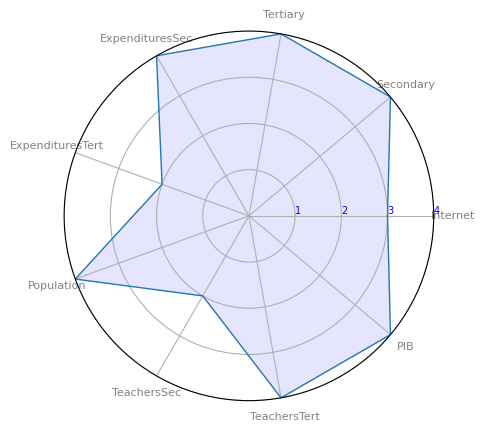

In [25]:
# Radar Plot pour les 8 premiers pays

# Test pour 1 pays :

from math import pi
 
# Set data
df = pd.DataFrame({
'group': liste_Pays,
'Internet': liste_Internet,
'Secondary': liste_Secondary,    
'Tertiary': liste_Tertiary,
'ExpendituresSec': liste_ExpendituresSec,
'ExpendituresTert': liste_ExpendituresTert,
'Population': liste_Population,
'TeachersSec': liste_TeachersSec,
'TeachersTert': liste_TeachersTert,
'PIB': liste_PIB,})

# number of variable
categories=list(df)[1:]
N = len(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)   #111 : positionnement du graphe

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3,4], ["1","2","3","4"], color="blue", size=7)
plt.ylim(0,4)

# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

# Show the graph
plt.show()

In [26]:
# Radar Plot pour les 8 premiers pays
# Test pour 8 pays :

from math import pi
 
# Set data
df = pd.DataFrame({
'group': liste_Pays,
'Internet': liste_Internet,
'Secondary': liste_Secondary,    
'Tertiary': liste_Tertiary,
'ExpendSec': liste_ExpendituresSec,
'ExpendTert': liste_ExpendituresTert,
'Pop1624': liste_Population,
'TeachersSec': liste_TeachersSec,
'TeachersTert': liste_TeachersTert,
'PIB': liste_PIB,})

 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True, )
    plt.subplots_adjust(wspace=0.8,hspace=0.8)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='blue', size=6)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4], ["1","2","3","4"], color="blue", size=8)
    plt.ylim(0,4)

    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.2)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
a=1
for row in range(0, len(df.index)):
    make_spider( row=row, title=str(a)+'. '+df['group'][row], color=my_palette(row))
    a+=1
    




In [28]:
#Sortir les valeurs par indicateurs (mean, med, quantile, Std) par Pays

table2015_bonIndic_Pays_V2[['IT.NET.USER.P2','SE.SEC.ENRR.UP','SE.TER.ENRR','SE.XPD.SECO.PC.ZS','SE.XPD.TERT.PC.ZS','SP.POP.1524.TO.UN','UIS.PTRHC.3','UIS.PTRHC.56','NY.GDP.MKTP.CD']].describe()


#Sortir les valeurs par indicateurs (mean, med, quantile, Std) par Region

#table2015_bonIndic_Region_Clean[['IT.NET.USER.P2','SE.SEC.ENRR.UP','SE.TER.ENRR','SE.XPD.SECO.PC.ZS','SE.XPD.TERT.PC.ZS','SP.POP.1524.TO.UN','UIS.PTRHC.3','UIS.PTRHC.56','NY.GDP.MKTP.CD']].describe()



,IT.NET.USER.P2,SE.SEC.ENRR.UP,SE.TER.ENRR,SE.XPD.SECO.PC.ZS,SE.XPD.TERT.PC.ZS,SP.POP.1524.TO.UN,UIS.PTRHC.3,UIS.PTRHC.56,NY.GDP.MKTP.CD
count,187.000000,187.000000,187.000000,187.000000,187.000000,1.870000e+02,187.000000,187.000000,1.870000e+02
mean,47.149936,76.418267,40.499654,21.234221,39.827360,6.640204e+06,16.982384,16.260338,4.105054e+11
std,28.008635,32.746699,22.935816,6.880240,28.611986,2.366295e+07,6.007414,5.787937,1.630739e+12
min,1.083733,10.362700,5.621730,0.015300,9.528600,1.445500e+04,6.434010,4.264080,3.151797e+08
25%,21.563148,43.342464,15.106865,15.120476,14.376822,4.975430e+05,11.603750,12.532175,1.048632e+10
50%,48.519836,81.097487,42.477834,23.368682,29.076846,1.421630e+06,15.845150,15.955767,4.140202e+10
75%,71.289000,95.734562,58.198820,29.181015,57.135689,5.087933e+06,21.898780,19.015135,1.974810e+11
max,98.200000,194.101990,94.732300,39.203770,126.773552,2.441202e+08,43.665588,64.406418,1.812071e+13


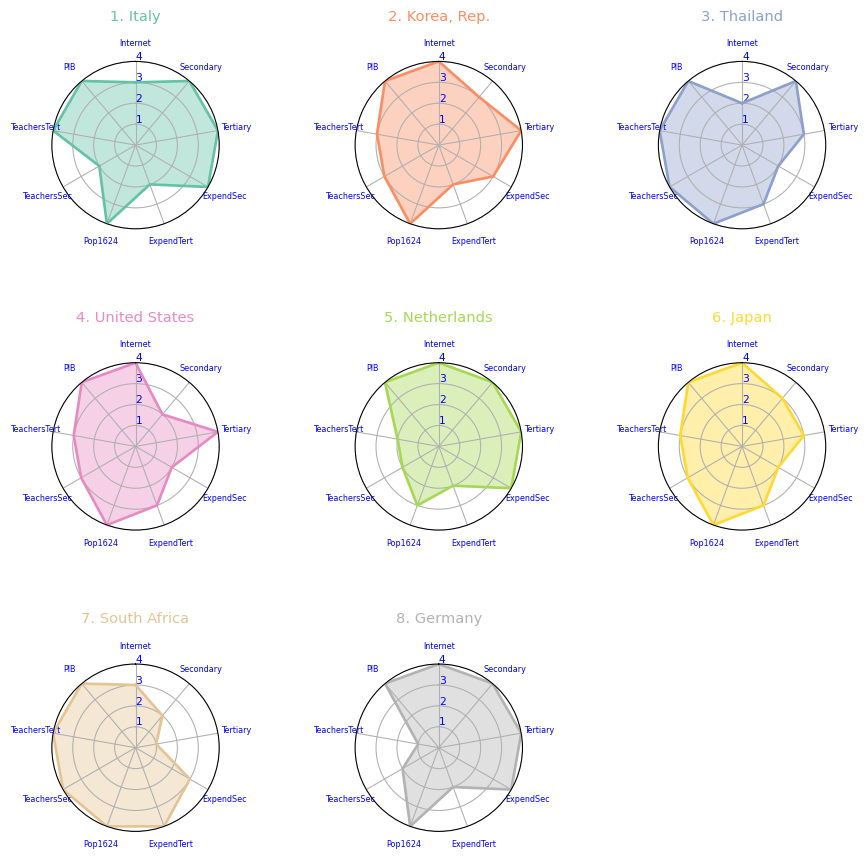

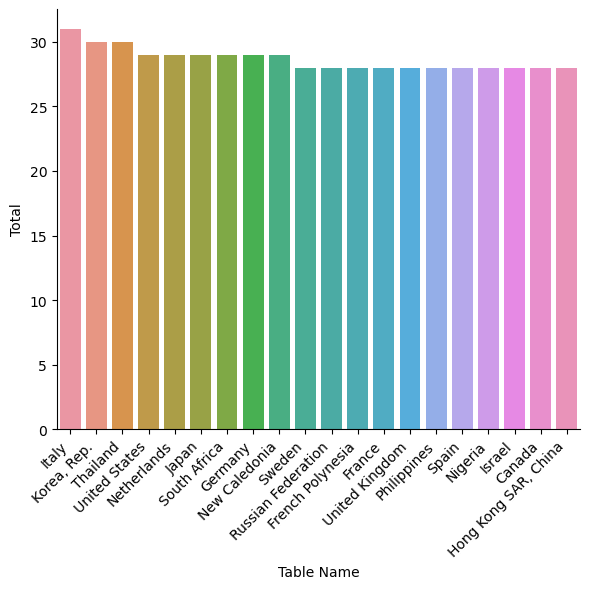

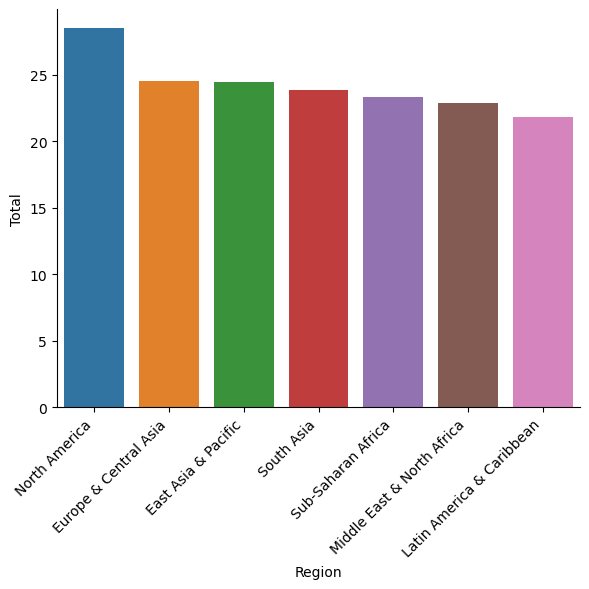

In [29]:
#finaliser les graphiques par indicateurs
#graphique pour les notes


ax=sns.catplot(data=tableau_Notation_Pays.head(20),x='Table Name',y='Total',kind="bar",height=6)
ax.set_xticklabels(rotation=45, ha="right")
plt.tight_layout()
plt.show()


bx=sns.catplot(data=tableau_Notation_Region.head(50),x='Region',y='Total',kind="bar",height=6)
bx.set_xticklabels(rotation=45, ha="right")
plt.tight_layout()
plt.show()



In [30]:

#choisir les 9 pays clés et faire un radar sur les pays

tableau_Notation_PaysCibles=tableau_Notation_Pays.head(8)
tableau_Notation_PaysCibles


#Projection sur les 5 ans

,Country Code,Table Name,Region,Internet,Secondary,Tertiary,ExpendituresSec,ExpendituresTert,Population,TeachersSec,TeachersTert,PIB,Total
179,ITA,Italy,Europe & Central Asia,3,4,4,4,2,4,2,4,4,31
164,KOR,"Korea, Rep.",East Asia & Pacific,4,3,4,3,2,4,3,3,4,30
183,THA,Thailand,East Asia & Pacific,2,4,3,2,3,4,4,4,4,30
157,USA,United States,North America,4,2,4,2,3,4,3,3,4,29
158,NLD,Netherlands,Europe & Central Asia,4,4,4,4,2,3,2,2,4,29
106,JPN,Japan,East Asia & Pacific,4,3,3,2,3,4,3,3,4,29
61,ZAF,South Africa,Sub-Saharan Africa,3,2,1,3,4,4,4,4,4,29
156,DEU,Germany,Europe & Central Asia,4,4,4,4,2,4,2,1,4,29


In [31]:
# Radar plot



In [32]:
# projection
liste_pays_cibles=['ITA','KOR','THA','USA','NLD','JPN','ZAF','DEU']

table2015_bonIndic_Pays_V2.rename(columns={'Country Code':'CountryCode'},inplace=True)

Pays_cible_Pop=table2015_bonIndic_Pays_V2.query('CountryCode==@liste_pays_cibles')
Pays_cible_Pop=Pays_cible_Pop[['CountryCode','Table Name','SP.POP.1524.TO.UN']]
Pays_cible_Pop

# Pour ces 9 pays, nous voyons quelle proportion de la population totale cela représente.
# pop totale : SP.POP.TOTL
# secondary2015=table2015_V3['Secondary'].isnull().sum().to_frame('nulls').sort_values(by=['nulls'])

poptot=table2015_V4['SP.POP.TOTL'].to_frame('PopTot')
poptot['CountryCode']=poptot.index
poptot

Pays_cible_Pop=pd.merge(Pays_cible_Pop,poptot,on='CountryCode',how='inner')

Pays_cible_Pop['PopCible (% PopTot)']=Pays_cible_Pop['SP.POP.1524.TO.UN']/Pays_cible_Pop['PopTot']

Pays_cible_Pop


,CountryCode,Table Name,SP.POP.1524.TO.UN,PopTot,PopCible (% PopTot)
0,ZAF,South Africa,9998431.0,5.501198e+07,0.181750
1,JPN,Japan,12157426.0,1.271410e+08,0.095622
2,KOR,"Korea, Rep.",6456561.0,5.101495e+07,0.126562
3,THA,Thailand,9149718.0,6.865760e+07,0.133266
4,DEU,Germany,8682394.0,8.168661e+07,0.106289
5,NLD,Netherlands,2005912.0,1.693992e+07,0.118413
6,ITA,Italy,5703349.0,6.073058e+07,0.093912
7,USA,United States,45147517.0,3.208966e+08,0.140692


In [33]:
# Nous verrons ensuite l'évolution de cette quantité ainsi que la quantité totale depuis 5 ans et nous ferons une projection en 2025.
# on repart du tableau pivot de base mais sur les 5 dernières années : 2010 à 2015

listings_StatsData2010a2015=listings_StatsData[['Country Name','Country Code','Indicator Code','2010','2011','2012','2013','2014','2015']]

listings_StatsData2010a2015=pd.pivot_table(listings_StatsData, values=['2010','2011','2012','2013','2014','2015'], index=['Country Code'],
                    columns=['Indicator Code'], aggfunc=np.sum)


In [34]:
#on filtre sur les pays concernés puis l'indicateur de population :
listings_StatsData2010a2015=listings_StatsData2010a2015.query("index==@liste_pays_cibles")

#on ne garde que les colonnes qui nous intéressent (à savoir 'SP.POP.TOTL' et 'SP.POP.1524.TO.UN' )
EvolPopTot=listings_StatsData2010a2015[[('2010',         'SP.POP.TOTL'),('2011',         'SP.POP.TOTL'),('2012',         'SP.POP.TOTL'),('2013',         'SP.POP.TOTL'),('2014',         'SP.POP.TOTL'),('2015',         'SP.POP.TOTL')]]
EvolPop1524=listings_StatsData2010a2015[[('2010',         'SP.POP.1524.TO.UN'),('2011',         'SP.POP.1524.TO.UN'),('2012',         'SP.POP.1524.TO.UN'),('2013',         'SP.POP.1524.TO.UN'),('2014',         'SP.POP.1524.TO.UN'),('2015',         'SP.POP.1524.TO.UN')]]



EvolPop1524
#Voyons maintenant le taux d'évolution depuis ces années et projetons le sur 2025.

,2010,2011,2012,2013,2014,2015
Indicator Code,SP.POP.1524.TO.UN,SP.POP.1524.TO.UN,SP.POP.1524.TO.UN,SP.POP.1524.TO.UN,SP.POP.1524.TO.UN,SP.POP.1524.TO.UN
Country Code,,,,,,
DEU,9388651.0,9255162.0,9111578.0,8964066.0,8819364.0,8682394.0
ITA,5810621.0,5792098.0,5770157.0,5746139.0,5723105.0,5703349.0
JPN,12637132.0,12472916.0,12355023.0,12272803.0,12211081.0,12157426.0
KOR,6619654.0,6600849.0,6594938.0,6583690.0,6543025.0,6456561.0
NLD,1997113.0,2001192.0,2003056.0,2003647.0,2004301.0,2005912.0
THA,9667306.0,9563182.0,9453800.0,9344150.0,9241093.0,9149718.0
USA,45137089.0,45296141.0,45343097.0,45307415.0,45230846.0,45147517.0
ZAF,9791869.0,9835899.0,9881207.0,9925487.0,9965374.0,9998431.0


In [35]:
#Modélisation :
Annee=['0','1','2','3','4','5'] #0 pour 2010, 5 pour 2015
liste_pays=['DEU','ITA','JPN','KOR','NLD','THA','USA','ZAF']


#Evolution 1524 :
Evol1524DEU=list(EvolPop1524.iloc[0])
Evol1524ITA=list(EvolPop1524.iloc[1])
Evol1524JPN=list(EvolPop1524.iloc[2])
Evol1524KOR=list(EvolPop1524.iloc[3])
Evol1524NLD=list(EvolPop1524.iloc[4])
Evol1524THA=list(EvolPop1524.iloc[5])
Evol1524USA=list(EvolPop1524.iloc[6])
Evol1524ZAF=list(EvolPop1524.iloc[7])

#Evolution pop totale :
EvolTotDEU=list(EvolPopTot.iloc[0])
EvolTotITA=list(EvolPopTot.iloc[1])
EvolTotJPN=list(EvolPopTot.iloc[2])
EvolTotKOR=list(EvolPopTot.iloc[3])
EvolTotNLD=list(EvolPopTot.iloc[4])
EvolTotTHA=list(EvolPopTot.iloc[5])
EvolTotUSA=list(EvolPopTot.iloc[6])
EvolTotZAF=list(EvolPopTot.iloc[7])

#ar_1524 = np.array([Evol1524DEU,Evol1524ITA,Evol1524JPN,Evol1524KOR,Evol1524NLD,Evol1524THA,Evol1524USA,Evol1524ZAF])
#df_1524 = pd.DataFrame(ar_1524, index = Annee, columns = liste_pays)

ar_Tot= np.array([EvolTotDEU,EvolTotITA,EvolTotJPN,EvolTotKOR,EvolTotNLD,EvolTotTHA,EvolTotUSA,EvolTotZAF])
df_Tot = pd.DataFrame({'DEU':list(EvolPopTot.iloc[0]),
                       'ITA':list(EvolPopTot.iloc[1]),
                       'JPN':list(EvolPopTot.iloc[2]),
                       'KOR':list(EvolPopTot.iloc[3]),
                       'NLD':list(EvolPopTot.iloc[4]),
                       'THA':list(EvolPopTot.iloc[5]),
                       'USA':list(EvolPopTot.iloc[6]),
                       'ZAF':list(EvolPopTot.iloc[7])}, index = ['0','1','2','3','4','5'])


ar_1524= np.array([Evol1524DEU,Evol1524ITA,Evol1524JPN,Evol1524KOR,Evol1524NLD,Evol1524THA,Evol1524USA,Evol1524ZAF])
df_1524 = pd.DataFrame({'DEU':list(EvolPop1524.iloc[0]),
                       'ITA':list(EvolPop1524.iloc[1]),
                       'JPN':list(EvolPop1524.iloc[2]),
                       'KOR':list(EvolPop1524.iloc[3]),
                       'NLD':list(EvolPop1524.iloc[4]),
                       'THA':list(EvolPop1524.iloc[5]),
                       'USA':list(EvolPop1524.iloc[6]),
                       'ZAF':list(EvolPop1524.iloc[7])}, index = ['0','1','2','3','4','5'])


df_1524['Annee']=df_1524.index
df_Tot['Annee']=df_Tot.index

df_Tot

,DEU,ITA,JPN,KOR,NLD,THA,USA,ZAF,Annee
0,81776930.0,59277417.0,128070000.0,49554112.0,16615394.0,67208808.0,309348193.0,5.097943e+07,0
1,80274983.0,59379449.0,127833000.0,49936638.0,16693074.0,67530130.0,311663358.0,5.172935e+07,1
2,80425823.0,59539717.0,127629000.0,50199853.0,16754962.0,67843979.0,313998379.0,5.250652e+07,2
3,80645605.0,60233948.0,127445000.0,50428893.0,16804432.0,68143065.0,316204908.0,5.331196e+07,3
4,80982500.0,60789140.0,127276000.0,50746659.0,16865008.0,68416772.0,318563456.0,5.414673e+07,4
5,81686611.0,60730582.0,127141000.0,51014947.0,16939923.0,68657600.0,320896618.0,5.501198e+07,5


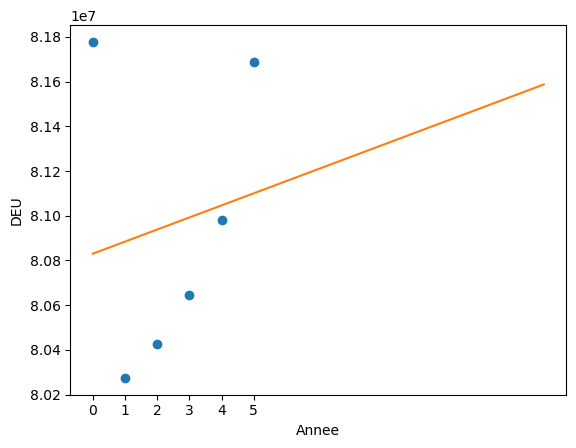

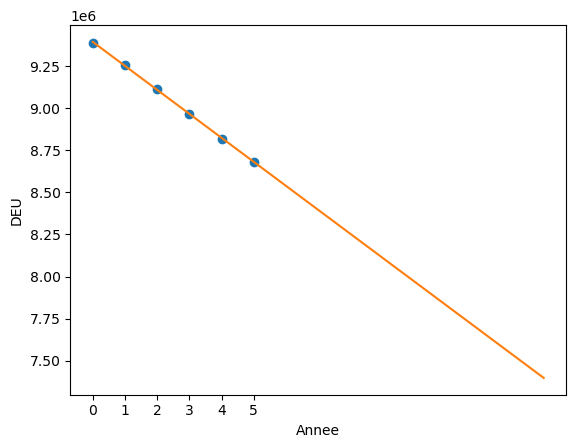

In [36]:
#Modélisation évolution Allemagne
#Pop Tot

import statsmodels.api as sm
Y = df_Tot['DEU']
X = df_Tot[['Annee']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X.astype(float)).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Annee'],result.params['intercept']

a_DEU_Tot=a
b_DEU_Tot=b

plt.plot(df_Tot.Annee,df_Tot.DEU, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("Annee")
plt.ylabel("DEU")
plt.show()

#Pop 1524
Y = df_1524['DEU']
X = df_1524[['Annee']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X.astype(float)).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Annee'],result.params['intercept']

a_DEU_1524=a
b_DEU_1524=b

plt.plot(df_1524.Annee,df_1524.DEU, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("Annee")
plt.ylabel("DEU")
plt.show()

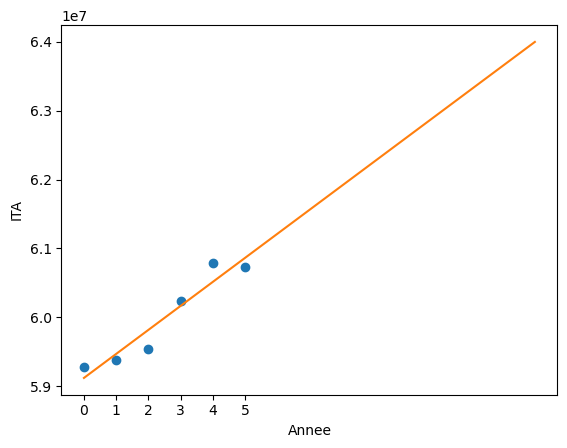

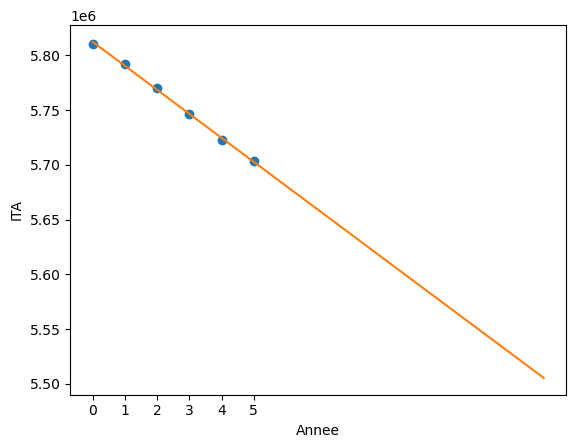

In [37]:
#liste_pays=['DEU','ITA','JPN','KOR','NLD','THA','USA','ZAF']
#Modélisation évolution Italie
#Pop Tot

import statsmodels.api as sm
Y = df_Tot['ITA']
X = df_Tot[['Annee']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X.astype(float)).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Annee'],result.params['intercept']

a_ITA_Tot=a
b_ITA_Tot=b

plt.plot(df_Tot.Annee,df_Tot.ITA, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("Annee")
plt.ylabel("ITA")
plt.show()

#Pop 1524
Y = df_1524['ITA']
X = df_1524[['Annee']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X.astype(float)).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Annee'],result.params['intercept']

a_ITA_1524=a
b_ITA_1524=b

plt.plot(df_1524.Annee,df_1524.ITA, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("Annee")
plt.ylabel("ITA")
plt.show()

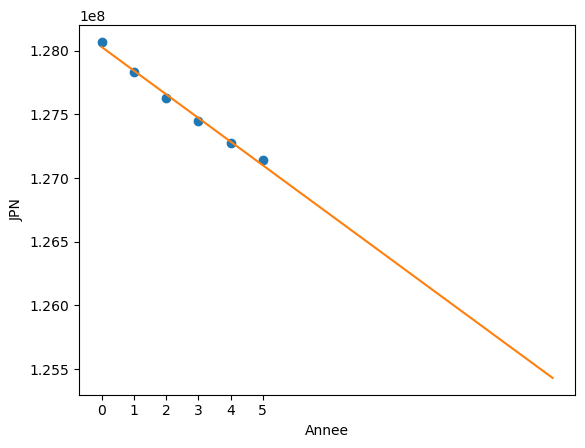

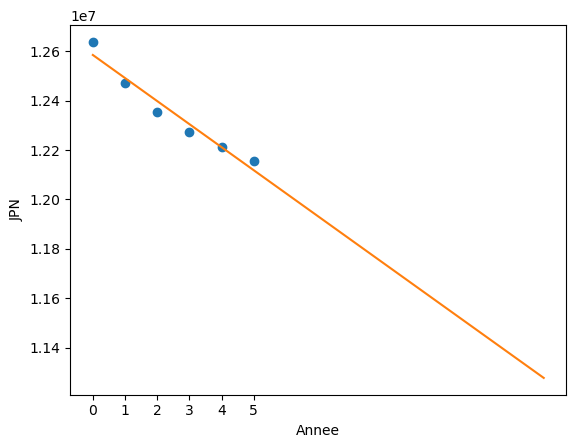

In [38]:
#liste_pays=['DEU','ITA','JPN','KOR','NLD','THA','USA','ZAF']
#Modélisation évolution JAPON
#Pop Tot

import statsmodels.api as sm
Y = df_Tot['JPN']
X = df_Tot[['Annee']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X.astype(float)).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Annee'],result.params['intercept']

a_JPN_Tot=a
b_JPN_Tot=b

plt.plot(df_Tot.Annee,df_Tot.JPN, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("Annee")
plt.ylabel("JPN")
plt.show()

#Pop 1524
Y = df_1524['JPN']
X = df_1524[['Annee']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X.astype(float)).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Annee'],result.params['intercept']

a_JPN_1524=a
b_JPN_1524=b

plt.plot(df_1524.Annee,df_1524.JPN, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("Annee")
plt.ylabel("JPN")
plt.show()

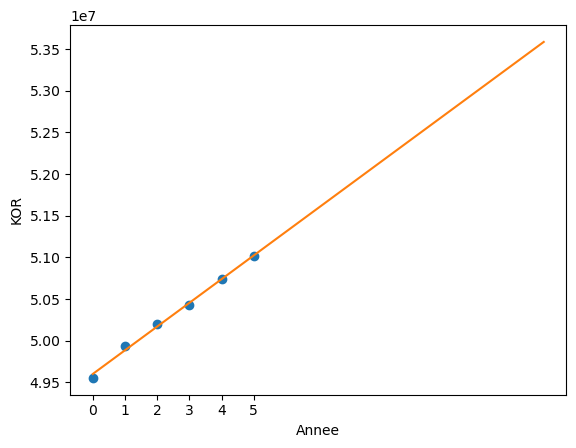

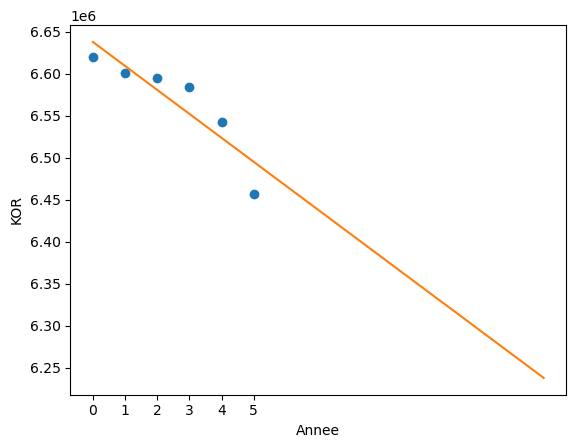

In [39]:
#liste_pays=['DEU','ITA','JPN','KOR','NLD','THA','USA','ZAF']
#Modélisation évolution KOREA
#Pop Tot

import statsmodels.api as sm
Y = df_Tot['KOR']
X = df_Tot[['Annee']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X.astype(float)).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Annee'],result.params['intercept']

a_KOR_Tot=a
b_KOR_Tot=b

plt.plot(df_Tot.Annee,df_Tot.KOR, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("Annee")
plt.ylabel("KOR")
plt.show()

#Pop 1524
Y = df_1524['KOR']
X = df_1524[['Annee']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X.astype(float)).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Annee'],result.params['intercept']

a_KOR_1524=a
b_KOR_1524=b

plt.plot(df_1524.Annee,df_1524.KOR, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("Annee")
plt.ylabel("KOR")
plt.show()

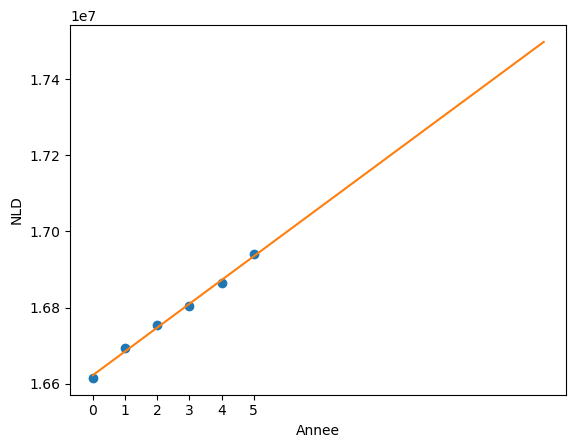

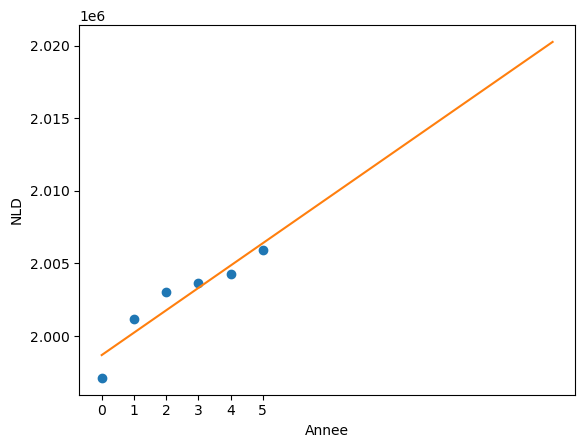

In [40]:
#liste_pays=['DEU','ITA','JPN','KOR','NLD','THA','USA','ZAF']
#Modélisation évolution Netherlands
#Pop Tot

import statsmodels.api as sm
Y = df_Tot['NLD']
X = df_Tot[['Annee']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X.astype(float)).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Annee'],result.params['intercept']

a_NLD_Tot=a
b_NLD_Tot=b

plt.plot(df_Tot.Annee,df_Tot.NLD, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("Annee")
plt.ylabel("NLD")
plt.show()

#Pop 1524
Y = df_1524['NLD']
X = df_1524[['Annee']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X.astype(float)).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Annee'],result.params['intercept']

a_NLD_1524=a
b_NLD_1524=b

plt.plot(df_1524.Annee,df_1524.NLD, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("Annee")
plt.ylabel("NLD")
plt.show()

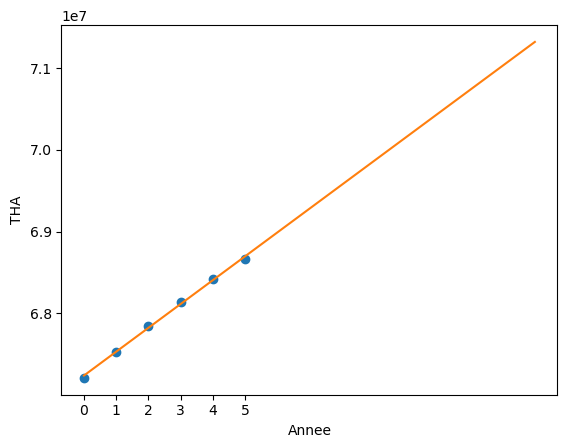

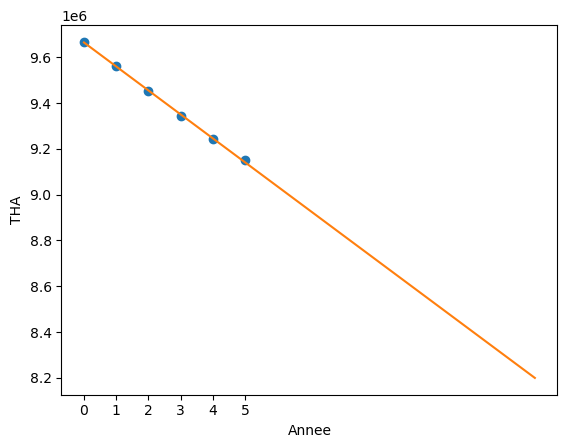

In [41]:
#liste_pays=['DEU','ITA','JPN','KOR','NLD','THA','USA','ZAF']
#Modélisation évolution Thailand
#Pop Tot

import statsmodels.api as sm
Y = df_Tot['THA']
X = df_Tot[['Annee']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X.astype(float)).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Annee'],result.params['intercept']

a_THA_Tot=a
b_THA_Tot=b

plt.plot(df_Tot.Annee,df_Tot.THA, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("Annee")
plt.ylabel("THA")
plt.show()

#Pop 1524
Y = df_1524['THA']
X = df_1524[['Annee']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X.astype(float)).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Annee'],result.params['intercept']

a_THA_1524=a
b_THA_1524=b

plt.plot(df_1524.Annee,df_1524.THA, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("Annee")
plt.ylabel("THA")
plt.show()

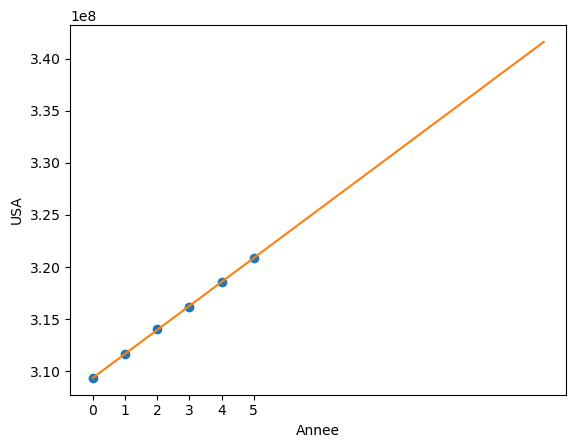

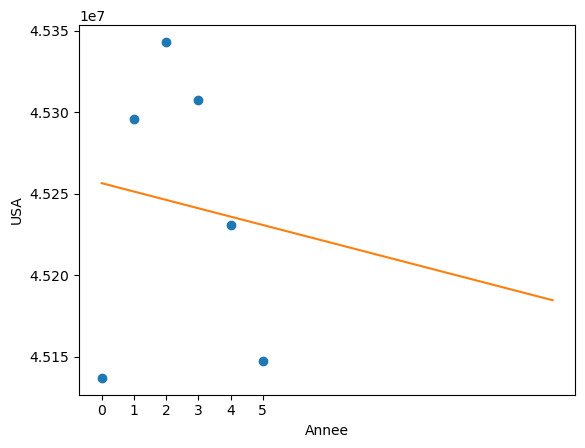

In [42]:
#liste_pays=['DEU','ITA','JPN','KOR','NLD','THA','USA','ZAF']
#Modélisation évolution USA
#Pop Tot

import statsmodels.api as sm
Y = df_Tot['USA']
X = df_Tot[['Annee']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X.astype(float)).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Annee'],result.params['intercept']

a_USA_Tot=a
b_USA_Tot=b

plt.plot(df_Tot.Annee,df_Tot.USA, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("Annee")
plt.ylabel("USA")
plt.show()

#Pop 1524
Y = df_1524['USA']
X = df_1524[['Annee']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X.astype(float)).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Annee'],result.params['intercept']

a_USA_1524=a
b_USA_1524=b

plt.plot(df_1524.Annee,df_1524.USA, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("Annee")
plt.ylabel("USA")
plt.show()

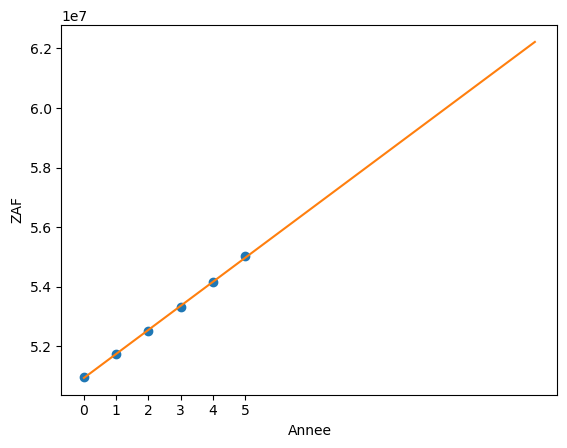

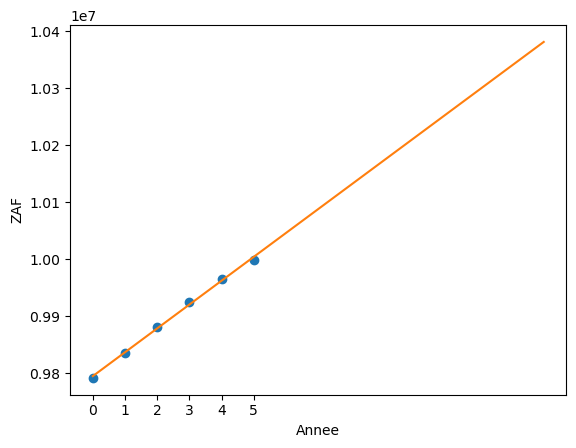

In [43]:
#liste_pays=['DEU','ITA','JPN','KOR','NLD','THA','USA','ZAF']
#Modélisation évolution South Africa
#Pop Tot

import statsmodels.api as sm
Y = df_Tot['ZAF']
X = df_Tot[['Annee']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X.astype(float)).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Annee'],result.params['intercept']

a_ZAF_Tot=a
b_ZAF_Tot=b

plt.plot(df_Tot.Annee,df_Tot.ZAF, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("Annee")
plt.ylabel("ZAF")
plt.show()


#Pop 1524
Y = df_1524['ZAF']
X = df_1524[['Annee']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X.astype(float)).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Annee'],result.params['intercept']

a_ZAF_1524=a
b_ZAF_1524=b

plt.plot(df_1524.Annee,df_1524.ZAF, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("Annee")
plt.ylabel("ZAF")
plt.show()



In [44]:
# OK Régression linéaire faite; reste à determiner l'évolution des populations tot et 1524 en l'an 2025
# voir quel pourcentage 1524 représente par rapport à tot en l'an 2025
# finir avec un tableau qui récapitule ces % et pop
# faire les radars plot (cf mail Benjamin)

a_DEU_Tot
b_DEU_Tot
a_DEU_1524
b_DEU_1524

a_ITA_Tot
b_ITA_Tot
a_ITA_1524
b_ITA_1524

a_JPN_Tot
b_JPN_Tot
a_JPN_1524
b_JPN_1524

a_KOR_Tot
b_KOR_Tot
a_KOR_1524
b_KOR_1524

a_NLD_Tot
b_NLD_Tot
a_NLD_1524
b_NLD_1524

a_THA_Tot
b_THA_Tot
a_THA_1524
b_THA_1524

a_USA_Tot
b_USA_Tot
a_USA_1524
b_USA_1524

a_ZAF_Tot
b_ZAF_Tot
a_ZAF_1524
b_ZAF_1524

9795031.523809522

In [ ]:
df_Tot.loc[6]=[a_DEU_Tot,a_ITA_Tot,a_JPN_Tot,a_KOR_Tot,a_NLD_Tot,a_THA_Tot,a_USA_Tot,a_ZAF_Tot,'a']
df_Tot.loc[7]=[b_DEU_Tot,b_ITA_Tot,b_JPN_Tot,b_KOR_Tot,b_NLD_Tot,b_THA_Tot,b_USA_Tot,b_ZAF_Tot,'b']

df_1524.loc[6]=[a_DEU_1524,a_ITA_1524,a_JPN_1524,a_KOR_1524,a_NLD_1524,a_THA_1524,a_USA_1524,a_ZAF_1524,'a']
df_1524.loc[7]=[b_DEU_1524,b_ITA_1524,b_JPN_1524,b_KOR_1524,b_NLD_1524,b_THA_1524,b_USA_1524,b_ZAF_1524,'b']


In [ ]:
df_Tot.loc[8]=[a_DEU_Tot*15+b_DEU_Tot,a_ITA_Tot*15+b_ITA_Tot,a_JPN_Tot*15+b_JPN_Tot,a_KOR_Tot*15+b_KOR_Tot
               ,a_NLD_Tot*15+b_NLD_Tot,a_THA_Tot*15+b_THA_Tot,a_USA_Tot*15+b_USA_Tot,a_ZAF_Tot*15+b_ZAF_Tot,'2025']

df_1524.loc[8]=[a_DEU_1524*15+b_DEU_1524,a_ITA_1524*15+b_ITA_1524,a_JPN_1524*15+b_JPN_1524,a_KOR_1524*15+b_KOR_1524
               ,a_NLD_1524*15+b_NLD_1524,a_THA_1524*15+b_THA_1524,a_USA_1524*15+b_USA_1524,a_ZAF_1524*15+b_ZAF_1524,'2025']

df_Tot_1=df_Tot[['DEU','ITA','JPN','KOR','NLD','THA','USA','ZAF']]
df_1524_1=df_1524[['DEU','ITA','JPN','KOR','NLD','THA','USA','ZAF']]

In [ ]:
Pays_cible_Pop

In [ ]:
df_Final=pd.DataFrame({'CountryCode':['DEU','ITA','JPN','KOR','NLD','THA','USA','ZAF'],
                       'Table Name':['Germany','Italy','Japan','Korea, Rep.','Netherlands','Thailand','United States','South Africa'],
                      'POP1524_2025':list(df_1524_1.iloc[8]),
                      'PopTot_2025':list(df_Tot_1.iloc[8])})

df_Final['PopCible (% PopTot) 2025']=df_Final['POP1524_2025']/df_Final['PopTot_2025']
df_Final.sort_values(by='PopCible (% PopTot) 2025',ascending=False)

In [ ]:
round(Pays_cible_Pop.sort_values(by='PopCible (% PopTot)',ascending=False),2)
#round(df_Tot,0)

In [ ]:
df_1524

In [ ]:
round(Pays_cible_Pop.sort_values(by='PopCible (% PopTot)',ascending=False),2)
